<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

# Desafío 1: Determinantes del ingreso

#### Integrantes
* Catalina Cerda
* José González
* Luis Porras

## Enunciado

Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el  Desarrollo.

Le encomiendan el  desarrollo de  un  modelo predictivo  sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos.

## Descripción de la base de datos:

Las variables que componen esta base se detallan a continuación:

*	`age`: Edad del individuo.
*	`workclass`: Naturaleza de la organización que emplea al individuo.
*	`education`: Nivel educacional del individuo.
*	`capital-gains`: Ingresos generados por inversiones fuera del trabajo.
*	`capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
*	`fnlwgt`: Ponderador muestral.
*	`marital-status`: Estado civil del individuo.
*	`occupation`: Ocupación del individuo.
*	`relationship`: Relación respecto a su familia.
*	`race`: Raza del encuestado.
*	`sex`: Sexo del encuestado.

## Aspectos adicionales a considerar (1.1)

* La base de datos contiene los valores perdidos como `?`.

In [1]:
# Librerias para procesamiento de Base de datos.
import pandas as pd
import numpy as np

# Librerías de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para Modelos de Clasificación (econometría):
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Liberías para Modelos de Clasificación (Machine Learning):
from statsmodels.formula.api import ols


#RegresiónLineal Machine 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


#  Librería para inspeccionar visualizar datos N/A
import missingno as msgn

# Se importa la librería para ignorar los mensajes de advertencia 
import warnings
warnings.filterwarnings("ignore")

# Libreria funciones auxiliares
import herramientas_prueba

Primero leemos nuestra base de datos contenida en el archivo: `income-db.csv` y se revisarán algunos valores de la base de datos.

In [2]:
# Obtenemos la informacion de la base de datos.
df = pd.read_csv('income-db.csv')
# obtenemos las 5 primeras filas de nuestra base de datos:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Inspeccionamos nuestra base de datos
print(df.shape)

(48842, 15)


Nuestra base de datos contiene 15 columnas **(Variables)** y 48842 filas **(Datos)**.

Procedemos a remplazar los valores pérdidos `?` con `N/A`. Ya que es perferible para el análisis y visualización de nuestra base de datos.

In [4]:
# Reemplazo de valores perdidos:
df = df.replace('?', np.nan)

Inspeccion de nuestra Data:

In [5]:
## Inspeccionamos cada columna en búsqueda de datos perdidos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Según lo reportado anteriormente , las columnas **"workclass"**, **"occupation"**, y **"native-country"** tienen datos perdidos, ya que el número de variables es inferior a `48842`, el cual es el total de filas.

Inspeccionamos de forma visual la cantidad de valores perdidos:


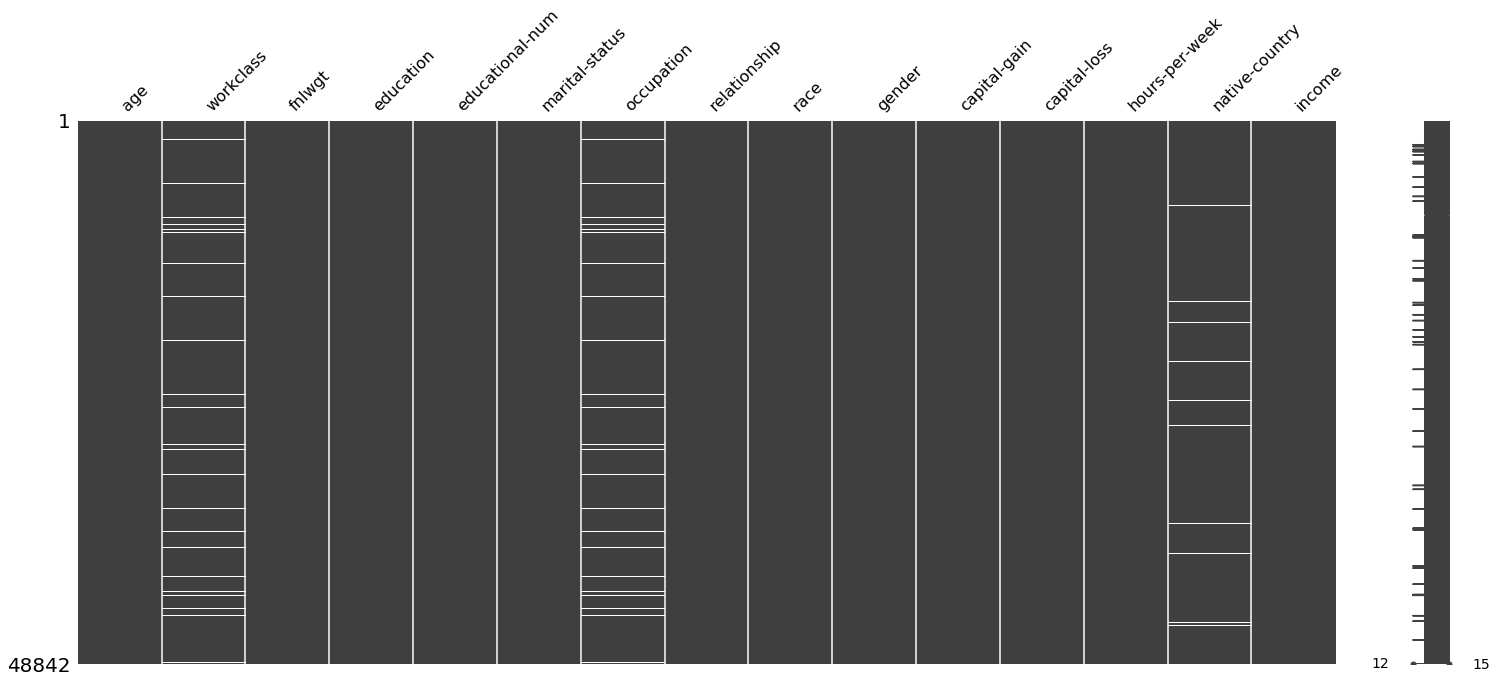

In [6]:
## se utiliza el método matrix de la librería missigno
msgn.matrix(df)

Tal como se ve en el gráfico anterior, la cantidad de datos perdidos se concentran en las columnas de **"Worclass"**, **"occupation"** y **"native-country"**.

In [7]:
# inspeccion cantidad de datos perdidos de la variable workclass
print(herramientas_prueba.get_missing_percent_info(df, 'workclass'))

El porcentaje de datos perdidos de la variable 'workclass' es: 5.73%


In [8]:
# inspeccion cantidad de datos perdidos de la variable occupation
print(herramientas_prueba.get_missing_percent_info(df, 'occupation'))

El porcentaje de datos perdidos de la variable 'occupation' es: 5.75%


In [ ]:
# inspeccion cantidad de datos perdidos de la variable native-country
print(herramientas_prueba.get_missing_percent_info(df, 'native-country'))

El porcentaje de datos perdidos de la variable 'native-country' es: 1.75%


In [ ]:
# Obtenemos el porcentaje total de datos perdidos:
print(herramientas_prueba.get_total_percent_of_nan_rows(df))

El porcentaje de datos perdidos si removemos todos los valores N/A es de: 92.59%


#####  Como los datos perdidos representan un poco más del 7% de la muestra consideramos que eliminarlos seria un error, por lo que optamos por dejarlos como valores nulos.

## Aspectos adicionales a considerar (1.2):

### Recodificar Variables:

* Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
    * `workclass` debe recodificarse como `workclass_recod` siguiendo una nomenclatura similar a:
        * federal-gov $\leftarrow$ Federal-gov.
        * state-level-gov $\leftarrow$ State-gov, Local-gov.
        * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        * unemployed $\leftarrow$ Never-worked, Without-pay.
    * `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
        * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
        * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
        * others $\leftarrow$ Other-service, Armed-Forces.
    * `education` debe recodificarse como `educ_recod` siguiendo una nomenclatura similar a:
        * preschool$\leftarrow$ Preschool
        * elementary-school$\leftarrow$ 1st-4th, 5th-6th
        * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
        * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    * `marital-status`  debe recodificarse como `civstatus`  siguiendo una  nomenclatura similar a:
        * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
        * divorced$\leftarrow$ Divorced
        * separated$\leftarrow$ Separated
        * widowed$\leftarrow$ Widowed
    * `native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes
    * `income` debe recodificarse de forma binaria.

### Recodificacion de la variable `workclass` (Naturaleza de la organización que emplea al individuo):

* `workclass` debe recodificarse como `workclass_recod` siguiendo una nomenclatura similar a:
    * federal-gov $\leftarrow$ Federal-gov.
    * state-level-gov $\leftarrow$ State-gov, Local-gov.
    * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    * unemployed $\leftarrow$ Never-worked, Without-pay.

Para ello veremos la cantidad de variables que se encuentran dentro de la columna.

In [ ]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Luego recodificaremos todas las filas de dicha columna:

In [ ]:
df['workclass'] = df['workclass'].replace([
    'Federal-gov',
    'State-gov', 'Local-gov',
    'Self-emp-inc', 'Self-emp-not-inc',
    'Never-worked', 'Without-pay'
],
[
    'federal-gov','state-level-gov', 'state-level-gov',
    'self-employed', 'self-employed', 'unemployed', 'unemployed'
])

Verificamos la recodificación:

In [ ]:
df['workclass'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass, dtype: int64

### Inspección visual de la variable `workclass` (Naturaleza de la organización que emplea al individuo):

Dado que `workclass` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

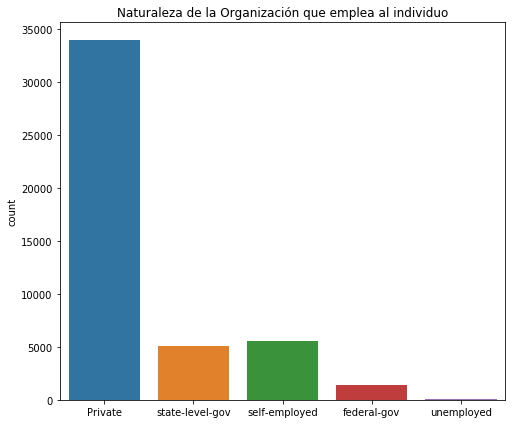

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['workclass']), 20, 6, 'Naturaleza de la Organización que emplea al individuo')

##### **Nota**:

Para el resto de columnas se hará un procedimiento parecido al anterior.

### Recodificacion de la Variable `occupation` (Ocupación del individuo):

* `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
    * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
    * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
    * others $\leftarrow$ Other-service, Armed-Forces

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df['occupation'] = df['occupation'].replace([
    #white-collar
    'Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales','Tech-support',
    #blue-collar
    'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners', 'Farming-fishing','Protective-serv','Priv-house-serv',
    #others
    'Other-service', 'Armed-Forces'
],
[   #white-collar
    'white-collar','white-collar','white-collar','white-collar', 'white-collar',
    #blue-collar
    'blue-collar', 'blue-collar', 'blue-collar','blue-collar', 'blue-collar', 'blue-collar', 'blue-collar',
    #others
    'others', 'others'
])

Luego verificamos la recodificación de las variables:

In [ ]:
df['occupation'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: occupation, dtype: int64

### Inspección visual de la variable `Occupation` (Ocupación del individuo):

Dado que `occupation` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['occupation']), 60, 6, 'Ocupación del individuo')

Podemos observar que la mayoria de individuos pertenecen a la categoría `white-collar`, es decir:

* Prof-specialty
* Exec-managerial
* Adm-clerical
* Sales
* Tech-support

El porcentaje menor en la gráfica corresponde a la categoría `others`, es decir:

* Other-service
* Armed-Forces

y el resto pertenecen a la categoría `blue-collar`, es decir:

* Craft-repair
* Machine-op-inspct
* Transport-moving
* Handlers-cleaners
* Farming-fishing
* Protective-serv
* Priv-house-serv.


### Recodificacion de la variable `education` (Nivel educacional del individuo):

* `education` debe recodificarse como `educ_recod` siguiendo una nomenclatura similar a:
    * preschool$\leftarrow$ Preschool
    * elementary-school$\leftarrow$ 1st-4th, 5th-6th
    * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
    * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate

In [ ]:
df['education'].value_counts()

In [ ]:
df['education'] = df['education'].replace([
    'Preschool',
    '1st-4th', '5th-6th',
    '7th-8th', '9th', '10th','11th', '12th', 'HS-grad',
    'Assoc-voc', 'Assoc-acdm', 'Some-college',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
],
[
    'preschool', 
    'elementary-school', 'elementary-school',
    'high-school', 'high-school', 'high-school','high-school', 'high-school', 'high-school',
    'college', 'college', 'college',
    'university', 'university', 'university', 'university'
])

Luego verificamos la recodificación de las variables:

In [ ]:
df['education'].value_counts()

### Inspección visual de `education` (Nivel educacional del individuo):

Dado que `education` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['education']), 60, 6, 'Nivel educacional del individuo')

Del gráfico anterior podemos ver que el mayor porcentaje de encuestados pertenencen a la categoría `high-school`, es decir se encuentran en `Escuela secundaria`.

Además un gran porcentaje se encuentran entre las categorías `college` y `university`, es decir estan estudiando en la Universidad o ya se han graduado de una Universidad.

### Recodificacion de la variable `marital-status` (Estado civil del individuo):

* `marital-status`  debe recodificarse como `civstatus`  siguiendo una  nomenclatura similar a:
    * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
    * divorced$\leftarrow$ Divorced
    * separated$\leftarrow$ Separated
    * widowed$\leftarrow$ Widowed

In [ ]:
df['marital-status'].value_counts()

In [ ]:
df['marital-status'] = df['marital-status'].replace([
    'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',
    'Divorced',
    'Separated',
    'Widowed'
],
[
    'married','married', 'married',
    'divorced',
    'separated',
    'widowed'
])

In [ ]:
df['marital-status'].value_counts()

### Inspección visual de la variable `marital-status` (Estado civil del individuo):

Dado que `Estado civil del individuo` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['marital-status']), 60, 6, 'Estado civil del individuo')

Del gráfico anterior, podemos ver que la mayoría de los individuos de nuestra base de datos pertenecen a la categorias

`Never-married` y `Married-civ-spouse`, quiere decir que son: 'Soltero(a)s', o se han casado.

### Recodificacion de la Variable: (País de origen):

* `native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes

In [ ]:
df['native-country'].value_counts()

In [ ]:
df['native-country'] = df['native-country'].replace ([
    # america
    'United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic',
    'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada',
    'Nicaragua', 'Honduras','Jamaica','Ecuador', 'Haiti','Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)',
    #europa
    'Ireland', 'Germany','Poland', 'England', 'Italy', 'Portugal',
    'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'France', 'Holand-Netherlands',
    #asia
    'Philippines', 'Thailand', 'Vietnam',
    'South', 'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China',
    'Iran', 'Hong', 'Philippines'
],
[
    # america
    'america', 'america','america', 'america', 'america',
    'america', 'america', 'america', 'america', 'america',
    'america','america','america','america', 'america', 'america',
    'america',
    #europa
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    #asia
    'asia', 'asia', 'asia',
    'asia', 'asia', 'asia', 'asia', 'asia', 'asia', 'asia',
    'asia', 'asia', 'asia'
])

verificamos la recodificación de las variables:

In [ ]:
df['native-country'].value_counts()

### Inspección visual de la variable `native-country` (País de Origen):

Dado que `País de Origen` es una variable que consideramos relevante para nuestra predicción, entonces la graficaremos:

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['native-country']), 15, 5, 'País de Origen')

Podemos ver que la gran mayoría de los individuos de nuestra base de datos se encuentra ubicado en la region **América**.

### Recodificacion de Income (Ingresos):

 - `income`: `<=50K` Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, `>50K` si el individuo percibe ingresos superiores a 50.000 dólares anuales.
 
**Siendo este nuestro vector objetivo**, debe recodificarse de forma binaria, dado que solo contiene 2 valores posíbles.

In [ ]:
# comprobamos que los datos pertenezcan a dichas categorías.
df['income'].value_counts('%')

### Inspeccion Visual de la variable `income` (Ingresos):

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['income']), 12, 5, 'Ingresos')

De el gráfico anterior, podemos inferir que la mayor candidad de los individuos de nuestra base de datos tiene ingresos
menores iguales a `$50.000` anual.  **Esto sin tener encuenta otras variables.**

Luego lo binarizamos utilizando el criterio mencionado anteriormente:

In [ ]:
# Haciendo uso del módulo Numpy y la función where.
df['income'] = np.where(df['income'] == '>50K', 1, 0)

Verificamos la binarización de nuestro **vector objetivo**:

In [ ]:
df['income'].value_counts('%')

### Renombrando las columnas:

Finalmente debemos renombrar el nombre de las columnas

In [ ]:
# Renombramos sólo las columnas que cambian.
df = df.rename(columns={
    'workclass': 'workclass_recod',
    'occupation': 'collars',
    'education': 'educ_recod',
    'marital-status': 'civstatus',
    'native-country': 'region'
})

Tomamos una muestra aleatoria de 5 individuos, para verificar las variables y datos:

In [ ]:
# retorna 5 items de la base de datos aleatoriamente.
df.sample(5)

## Modelación descriptiva.
**(Hito 3: Sesión Presencial 1, Unidad 8)**

**Elementos a considerar**:

* La modelación mediante regresión.
* La interpretación de los principales regresores.
* La definición de las estrategias de Modelación predictiva.

Debido a a que nuestro vector objetivo es la variable `income` (Ingresos) y dicha variable es binaria, entonces se opta por una clasificación.

**Implementaremos Regresión Logistica desde la econometría**:

In [ ]:
df.head()

Se procede a graficar la variable independiente **age (Edad)**.

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['age']), 12, 6, 'Edad')

La gráfica de nuestra variable **age (Edad)**: Sugiere un comportamiento cercano a la distribución normal.

#### Graficaremos la variable independiente `hours-per-week` (Horas por semana):

In [ ]:
herramientas_prueba.visualize_rows(df.filter(['hours-per-week']), 20, 3, 'Horas por semana')

Podemos análizar visualmente de la gráfica anterior que la variable **hours-per-week**:
    * Tiene como mayor valor frecuente 40 horas a la semana.
    * Podemos observar que el 50% de los individuos trabajan menos de 40 horas a la semana y el otro 50% trabajan más
    de 40 horas a la semana.
    * Además el promedio de total de horas laboradas tiende a 40 horas.

Esto lo podemos corroborar calculando la Mediana, Media y Moda:

In [ ]:
# obtenemos la mediana
print(f"La mediana de la variable horas a la semana es de: {df['hours-per-week'].median()}")
# obtenemos la moda
print(f"La moda de horas a la semana es de: {df['hours-per-week'].mode()[0]}")
# obtenemos el valor promedio
print(f"El valor promedio de horas a la semana es de: {round(df['hours-per-week'].mean(), 2)}")

Necesitamos un **modelo predictivo** sobre la probabilidad de que un individuo presente salarios por sobre o bajo los `$50.000` dolares anuales en base a los atributos **socio-demográficos**:

-	`age`:  Edad
-   `workclass_recod`: Naturaleza de la organización que emplea al individuo
-	`education`: Nivel educacional del individuo.
-	`civstatus`: Estado civil del individuo
-	`collars`: Profesion.
-	`relationship`: Relación respecto a su familia
-	`race`: Raza del encuestado
-	`sex`: Sexo del encuestado
-	`hours-per-week`: Horas a la semana
-	`region`:  País de origen

Dado que nuestra **variable objetivo `Income`** es Binaria.  Entonces implementaremos una Clasificación por medio de Regresión Logística con un modelo Saturado.

In [ ]:
modelo_logit = smf.logit('income ~ age + region + collars + civstatus + race', df).fit()

In [ ]:
modelo_logit.summary()

Segun lo reportado por nuestro modelo, las variables con significancia estadística al 95% son: `age`, `collars`, `civstatus`, `race`

Nuestro modelo podría ser depurado a:

In [ ]:
modelo_logit = smf.logit('income ~ age + collars + civstatus + race', df).fit()

In [ ]:
modelo_logit.summary()

In [ ]:
# Imprimiendo log_odds y probabilidad:
herramientas_prueba.print_logit_estimations(modelo_logit, 'ingreso superior o igual a $50.0000 dólares anual')

**Nota**:  Podemos seguir depurando el modelo si binarizamos algúnas variables como `collars`, `civstatus`, y/o `race`

## Modelación predictiva.
**Hito 4: Sesión Presencial 2, Unidad 8**

**TODO**:  Aplicar Machine Learning

In [ ]:
# Separación de la data para predicciones:
df_copy = df.copy()
(x_train, x_test, y_train, y_test) = train_test_split(
    df_copy.drop(columns=['income']),
    df_copy['income'],
    test_size=0.33,
    random_state=2019
)